# White Tone from White Noise

<IPython.core.display.Javascript object>


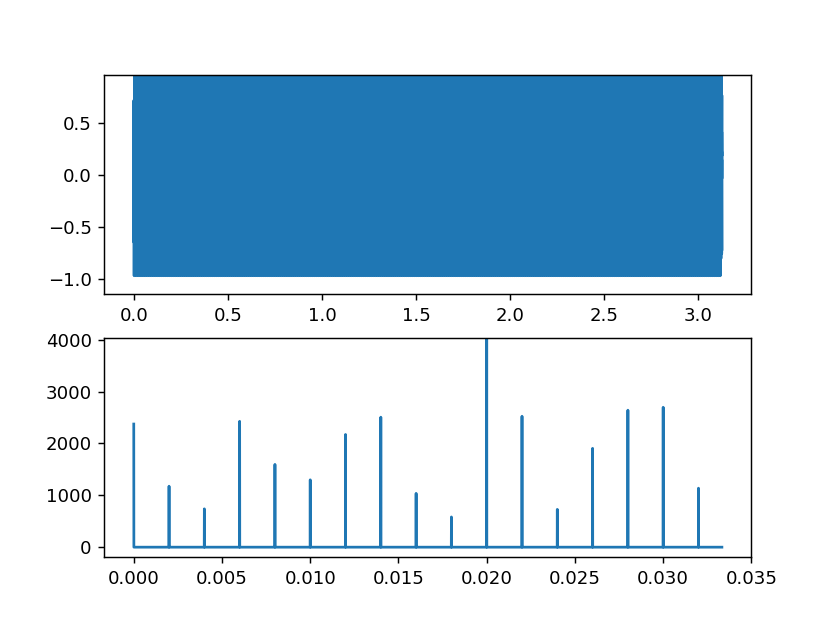

interactive(children=(IntSlider(value=500, description='L', max=1500, min=10), Output()), _dom_classes=('widge…

In [15]:
import numpy as np
from   numpy import linspace, sin, zeros
from   math import pi
%matplotlib notebook
import matplotlib.pyplot as plt
from   tikzplotlib import save as tikz_save

from   IPython.display import display, Markdown, clear_output
import IPython.display as ipd
import ipywidgets as widgets
from   ipywidgets import *

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

fs          = 48000
L           = 500



# a function for appending the array again and again
# arbitrary 300 times ...
def appender(x):
    y = np.array([])

    for i in range(300):
        y = np.append(y,x*0.33)

    return y
    
    
x = np.random.standard_normal(L)
y = appender(x)

t = np.linspace(0,len(y)/fs,len(y))
f = np.linspace(0,1,len(y))

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
line, = ax.plot(t,y)

ax2    = fig.add_subplot(2, 1, 2)
Y = abs(np.fft.fft(y))

Y = Y[0:5000]
f = f[0:5000]

line2, = ax2.plot(f,Y)

def update(L = widgets.IntSlider(min = 10, max= 1500, step=1, value=500)):          
     
    x = np.random.standard_normal(L)
    y = appender(x)     
     
    t = np.linspace(0,len(y)/fs,len(y))
    f = np.linspace(0,1,len(y))

    Y = abs(np.fft.fft(y))
    Y = Y[0:5000]
    f = f[0:5000]
    
    line.set_ydata(y)
    line2.set_ydata(Y)

    fig.canvas.draw_idle()
    ipd.display(ipd.Audio(y, rate=fs))
    


interact(update);
 


# Karplus-Strong

Karplus-Strong makes use of the random buffer.

<IPython.core.display.Javascript object>


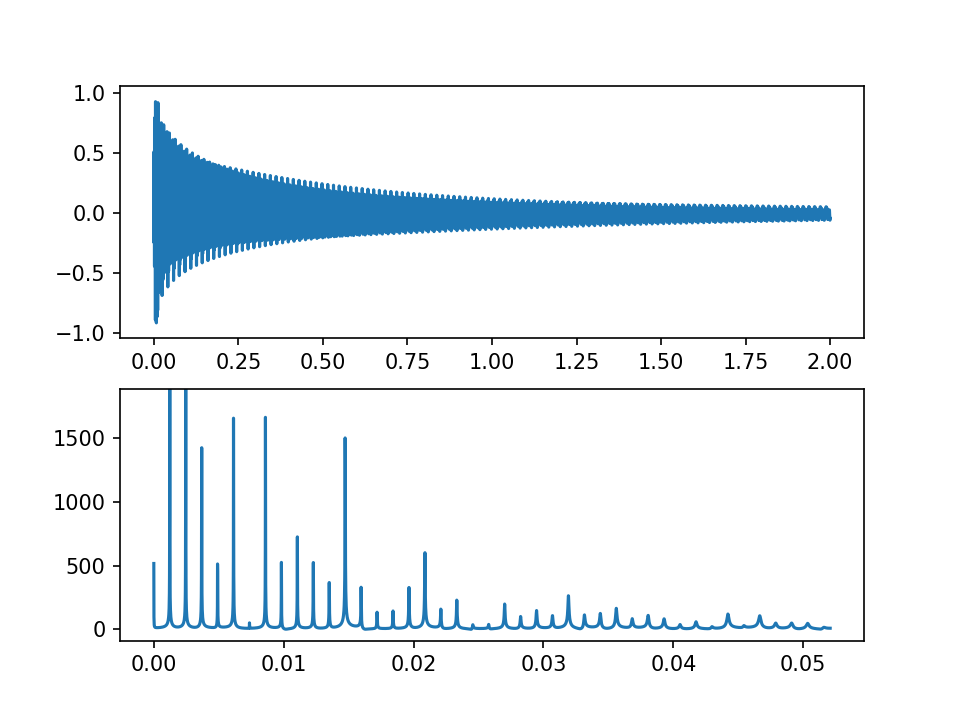

interactive(children=(ToggleButtons(description='b', options=('Recalculate', 'Recalculate'), value='Recalculat…

In [5]:
# this implementation serves for a better  
# understanding and is not efficient
#
# - wait for process to be finished in 
#   interactive use


fs          = 48000
L           = 500

# the feedback gain
gain   = 0.99

# the number of samples used for smoothing
smooth = 10

 
def karplus_strong(L,gain,smooth):
    
    x = np.random.standard_normal(L)
    y = np.array([])

    
    for i in range(96000):
        k   = i%L                       
        tmp = 0;
                
        for j in range(smooth):             
            tmp += x[(k+j) %L]
            
        tmp = tmp/smooth
            
        x[k] = gain*tmp
        y = np.append(y,tmp)

    return y
    
    
y = karplus_strong(L,gain,smooth)

t = np.linspace(0,len(y)/fs,len(y))
f = np.linspace(0,1,len(y))

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
line, = ax.plot(t,y)

ax2    = fig.add_subplot(2, 1, 2)
Y = abs(np.fft.fft(y))

Y = Y[0:5000]
f = f[0:5000]

line2, = ax2.plot(f,Y)

def update(b = widgets.ToggleButtons( options=['Recalculate'],disabled=False),
          L = widgets.IntSlider(min = 10, max= 1500, step=1, value=500),
           gain = widgets.FloatSlider(min = 0.8, max= 1, step=0.01, value=0.99),        
          smooth = widgets.IntSlider(min = 1, max= 20, step=1, value=10)):          
     
    print(b)    
    
    y = karplus_strong(L,gain,smooth)     
     
    t = np.linspace(0,len(y)/fs,len(y))
    f = np.linspace(0,1,len(y))

    Y = abs(np.fft.fft(y))
    Y = Y[0:5000]
    f = f[0:5000]
    
    line.set_ydata(y)
    line2.set_ydata(Y)

    fig.canvas.draw_idle()
    ipd.display(ipd.Audio(y, rate=fs))
    


interact(update);